In [1]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (negativos porque linprog minimiza)
c = [-2000, -1000]

# Coeficientes de las restricciones
A = [
    [60, 60],      # trabajo manual
    [180, 30]      # trabajo máquina
]
b = [30000, 48000]

# Restricciones de no negatividad
x_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x_bounds], method='highs')

# Resultados
x1, x2 = res.x
beneficio_max = -res.fun

print(f"Fabricar {x1:.0f} coches modelo C1")
print(f"Fabricar {x2:.0f} coches modelo C2")
print(f"Beneficio máximo: {beneficio_max:.2f} euros")

Fabricar 220 coches modelo C1
Fabricar 280 coches modelo C2
Beneficio máximo: 720000.00 euros


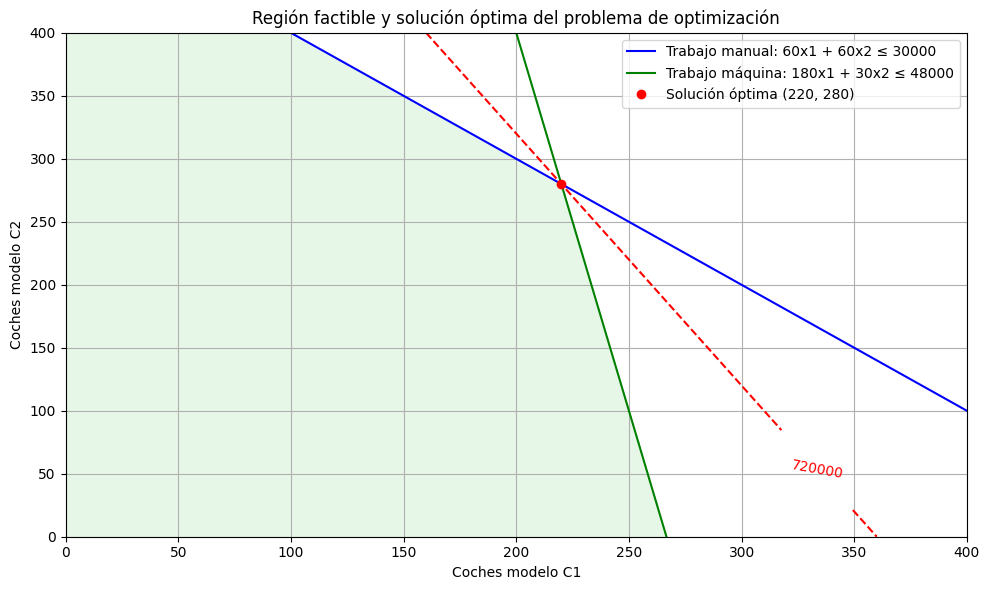

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear variables para el número de coches C1 y C2
x1 = np.linspace(0, 400, 500)
x2 = np.linspace(0, 400, 500)

# Restricciones
# 60x1 + 60x2 <= 30000 (trabajo manual en minutos)
# 180x1 + 30x2 <= 48000 (trabajo de máquina en minutos)

# Despejar x2 en función de x1 para graficar las restricciones
x2_manual = (30000 - 60 * x1) / 60
x2_maquina = (48000 - 180 * x1) / 30

# Crear gráfico
plt.figure(figsize=(10, 6))

# Graficar restricciones
plt.plot(x1, x2_manual, label='Trabajo manual: 60x1 + 60x2 ≤ 30000', color='blue')
plt.plot(x1, x2_maquina, label='Trabajo máquina: 180x1 + 30x2 ≤ 48000', color='green')

# Rellenar la región factible
x1_grid, x2_grid = np.meshgrid(x1, x2)
cond1 = 60 * x1_grid + 60 * x2_grid <= 30000
cond2 = 180 * x1_grid + 30 * x2_grid <= 48000
region_factible = cond1 & cond2

plt.contourf(x1, x2, region_factible, levels=[0.5, 1], colors=['#d0f0d0'], alpha=0.5)

# Graficar línea de nivel de beneficio máximo
Z = 2000 * x1_grid + 1000 * x2_grid
CS = plt.contour(x1, x2, Z, levels=[720000], colors='red', linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10)

# Punto óptimo
plt.plot(220, 280, 'ro', label='Solución óptima (220, 280)')

# Detalles del gráfico
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel('Coches modelo C1')
plt.ylabel('Coches modelo C2')
plt.title('Región factible y solución óptima del problema de optimización')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()